In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/vegfru/veg200_images/water_caltrop/v_02_09_0248.jpg
/kaggle/input/vegfru/veg200_images/water_caltrop/v_02_09_0338.jpg
/kaggle/input/vegfru/veg200_images/water_caltrop/v_02_09_0188.jpg
/kaggle/input/vegfru/veg200_images/water_caltrop/v_02_09_0304.jpg
/kaggle/input/vegfru/veg200_images/water_caltrop/v_02_09_0095.jpg
/kaggle/input/vegfru/veg200_images/water_caltrop/v_02_09_0115.jpg
/kaggle/input/vegfru/veg200_images/water_caltrop/v_02_09_0192.jpg
/kaggle/input/vegfru/veg200_images/water_caltrop/v_02_09_0578.jpg
/kaggle/input/vegfru/veg200_images/water_caltrop/v_02_09_0526.jpg
/kaggle/input/vegfru/veg200_images/water_caltrop/v_02_09_0588.jpg
/kaggle/input/vegfru/veg200_images/water_caltrop/v_02_09_0589.jpg
/kaggle/input/vegfru/veg200_images/water_caltrop/v_02_09_0408.jpg
/kaggle/input/vegfru/veg200_images/water_caltrop/v_02_09_0074.jpg
/kaggle/input/vegfru/veg200_images/water_caltrop/v_02_09_0440.jpg
/kaggle/input/vegfru/veg200_images/water_caltrop/v_02_09_0204.jpg
/kaggle/in

KeyboardInterrupt: 

In [1]:
import os
import shutil

# Paths
original_dataset_dir = '/kaggle/input/vegfru/fru92_images'
mini_dataset_dir = '/kaggle/working/ds'

# Your selected 20 classes
selected_classes = [
    'apple', 'banana', 'grape', 'lemon', 'olive',
    'pomegranate'
]

# Create the mini dataset directory
os.makedirs(mini_dataset_dir, exist_ok=True)

for class_name in selected_classes:
    src = os.path.join(original_dataset_dir, class_name)
    dst = os.path.join(mini_dataset_dir, class_name)

    if os.path.exists(src):
        shutil.copytree(src, dst)
        print(f"Copied class: {class_name}")
    else:
        print(f"Warning: {class_name} not found in source directory.")

Copied class: apple
Copied class: banana
Copied class: grape
Copied class: lemon
Copied class: olive
Copied class: pomegranate


In [2]:
original_dataset_dir = '/kaggle/input/vegfru/veg200_images'
mini_dataset_dir = '/kaggle/working/ds'

# Your selected 20 classes
selected_classes = [
    'broccoli', 'carrot', 'corn', 'cucumber', 'eggplant',
    'basil', 'garlic', 'potato', 'tomato'
]

# Create the mini dataset directory
os.makedirs(mini_dataset_dir, exist_ok=True)

for class_name in selected_classes:
    src = os.path.join(original_dataset_dir, class_name)
    dst = os.path.join(mini_dataset_dir, class_name)

    if os.path.exists(src):
        shutil.copytree(src, dst)
        print(f"Copied class: {class_name}")
    else:
        print(f"Warning: {class_name} not found in source directory.")

Copied class: broccoli
Copied class: carrot
Copied class: corn
Copied class: cucumber
Copied class: eggplant
Copied class: basil
Copied class: garlic
Copied class: potato
Copied class: tomato


In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)
IMG_SIZE = 224
BATCH_SIZE = 32

train_generator = datagen.flow_from_directory(
    "/kaggle/working/ds",
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training',
    shuffle=True
)

val_generator = datagen.flow_from_directory(
    "/kaggle/working/ds",
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation',
    shuffle=False
)

labels = list(train_generator.class_indices.keys())

# Save to labels.txt
with open('/kaggle/working/labels.txt', 'w') as f:
    for label in labels:
        f.write(f"{label}\n")

print("labels.txt saved.")

2025-05-10 18:05:38.436727: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1746900338.664937      31 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1746900338.718093      31 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


Found 10947 images belonging to 15 classes.
Found 2730 images belonging to 15 classes.
labels.txt saved.


2025-05-10 18:06:22.295499: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 224, 224, 3)    │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ Conv1 (Conv2D)            │ (None, 112, 112, 32)   │            864 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ bn_Conv1                  │ (None, 112, 112, 32)   │            128 │ Conv1[0][0]            │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ Conv1_relu (ReLU)         │ (None, 112, 112, 32)   │              0 │ bn_Conv1[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_depthwise   │ (None, 112, 112, 32)   │            288 │ Conv1_relu[0][0]       │
│ (DepthwiseConv2D)         │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_depthwise_… │ (None, 112, 112, 32)   │            128 │ expanded_conv_depthwi… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_depthwise_… │ (None, 112, 112, 32)   │              0 │ expanded_conv_depthwi… │
│ (ReLU)                    │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_project     │ (None, 112, 112, 16)   │            512 │ expanded_conv_depthwi… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_project_BN  │ (None, 112, 112, 16)   │             64 │ expanded_conv_project… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_expand (Conv2D)   │ (None, 112, 112, 96)   │          1,536 │ expanded_conv_project… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_expand_BN         │ (None, 112, 112, 96)   │            384 │ block_1_expand[0][0]   │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_expand_relu       │ (None, 112, 112, 96)   │              0 │ block_1_expand_BN[0][… │
│ (ReLU)                    │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_pad               │ (None, 113, 113, 96)   │              0 │ block_1_expand_relu[0… │
│ (ZeroPadding2D)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_depthwise         │ (None, 56, 56, 96)     │            864 │ block_1_pad[0][0]      │
│ (DepthwiseConv2D)         │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_depthwise_BN 

 Total params: 2,277,199 (8.69 MB)

 Trainable params: 19,215 (75.06 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


 94/343 ━━━━━━━━━━━━━━━━━━━━ 3:07 754ms/step - accuracy: 0.1043 - loss: 3.2126

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1045: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


343/343 ━━━━━━━━━━━━━━━━━━━━ 327s 928ms/step - accuracy: 0.2064 - loss: 2.6764 - val_accuracy: 0.6971 - val_loss: 1.2090
Epoch 2/10
343/343 ━━━━━━━━━━━━━━━━━━━━ 323s 930ms/step - accuracy: 0.6710 - loss: 1.1541 - val_accuracy: 0.8286 - val_loss: 0.7160
Epoch 3/10
343/343 ━━━━━━━━━━━━━━━━━━━━ 329s 952ms/step - accuracy: 0.8053 - loss: 0.7298 - val_accuracy: 0.8667 - val_loss: 0.5332
Epoch 4/10
343/343 ━━━━━━━━━━━━━━━━━━━━ 326s 949ms/step - accuracy: 0.8487 - loss: 0.5529 - val_accuracy: 0.8846 - val_loss: 0.4433
Epoch 5/10
343/343 ━━━━━━━━━━━━━━━━━━━━ 339s 986ms/step - accuracy: 0.8718 - loss: 0.4515 - val_accuracy: 0.8963 - val_loss: 0.3849
Epoch 6/10
343/343 ━━━━━━━━━━━━━━━━━━━━ 338s 982ms/step - accuracy: 0.8920 - loss: 0.3941 - val_accuracy: 0.9037 - val_loss: 0.3486
Epoch 7/10
343/343 ━━━━━━━━━━━━━━━━━━━━ 335s 974ms/step - accuracy: 0.8932 - loss: 0.3675 - val_accuracy: 0.9088 - val_loss: 0.3245
Epoch 8/10
343/343 ━━━━━━━━━━━━━━━━━━━━ 339s 984ms/step - accuracy: 0.9060 - loss: 0.31

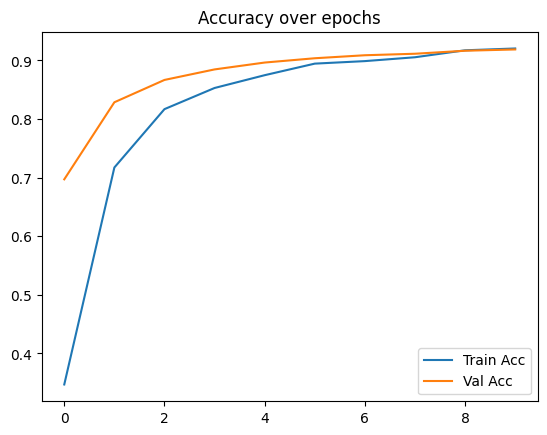

In [4]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt


# Step 5: Build the Model
base_model = MobileNetV2(input_shape=(IMG_SIZE, IMG_SIZE, 3), include_top=False, weights='imagenet')
base_model.trainable = False  # Freeze the base

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.3)(x)
predictions = Dense(train_generator.num_classes, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=predictions)

model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

# Step 6: Train
EPOCHS = 10

history = model.fit(
    train_generator,
    epochs=EPOCHS,
    validation_data=val_generator
)

# Step 7: Plot Results
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.legend()
plt.title('Accuracy over epochs')
plt.show()

# Step 8: Save Model (Optional)
model.save('/kaggle/working/vegfru_mobilenet_model.h5')

In [5]:
# Step 2: Convert to TensorFlow Lite
converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]  # optional: enables quantization
tflite_model = converter.convert()

# Step 3: Save the .tflite model
tflite_path = '/kaggle/working/vegfru_model.tflite'
with open(tflite_path, 'wb') as f:
    f.write(tflite_model)

print(f"Model converted and saved at: {tflite_path}")

Saved artifact at '/tmp/tmprxnrfycr'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name='keras_tensor')
Output Type:
  TensorSpec(shape=(None, 15), dtype=tf.float32, name=None)
Captures:
  138072265542160: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138072265544080: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138072265543120: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138072265544848: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138072265542544: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138072265544464: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138072265545808: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138072265543696: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138072265542736: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138072265545424: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1380722655456

W0000 00:00:1746903837.838365      31 tf_tfl_flatbuffer_helpers.cc:365] Ignored output_format.
W0000 00:00:1746903837.838445      31 tf_tfl_flatbuffer_helpers.cc:368] Ignored drop_control_dependency.
I0000 00:00:1746903837.993391      31 mlir_graph_optimization_pass.cc:401] MLIR V1 optimization pass is not enabled
